<a href="https://colab.research.google.com/github/pankajmanisahu/EDA-ON-HOTEL-BOOKING-ANALYSIS/blob/main/24_DEC_HOTEL_BOOKING_ANALYSIS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Project Name -** 



##### **Project Type**    - HOTEL BOOKING ANALYSIS EDA 
##### **Contribution**    - Individual
##### **Name -** Pankaj Mnai Sahu



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

cancellation:

3. General cancellation rate / Q12)  Which hotel has higher bookings cancellation rate.
4. weekend stays are getting cancelled more or weedays ones
5. children or babies impact on cancellation
6. reservered and assigned room impact on cancellation/ Q19) Whether not getting allotted the same room type as demand is the main cause of cancellation for bookings?
7. Which customer type tend to cancel more
Q18) Does a  longer waiting period or longer lead time causes the cancellation of bookings?

8.  Which significant distribution channel has the highest cancellation percentage?


booking:
9. Which room type is in most demand and which room type generatesthe  highest adr?
10. What isthe  percentage of bookings in each hotel?
11. Which is the most common channel for booking hotels?
12.  Which channel is mostly used forthe  early booking of hotels?
13. Which meal type isthe  most preffered meal of customers?

TIME:
14. Which are the most busy months?
15. What is the trend of bookings within a month?
16.  Which hotel hasa  higher lead time?

SERVICE:
17. How long do people stay at the hotels?
18.  What is preferred stay length in each hotel?
19.  Which hotel hasa  high chance that its customer will return for another stay?

 
ADR:
20.  Which hotel seems to make more revenue?
21. Does not alloting the  same room as demanded affect adr? 


#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline
import missingno as msno

### Dataset Loading

In [2]:
hotel_df = pd.read_csv('/content/Hotel Bookings.csv')

### Dataset First View

In [3]:
# Dataset First Look
pd.set_option('display.max_columns', None)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
hotel_df.shape

(119390, 32)

### Dataset Information

In [5]:
# Dataset Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(hotel_df[hotel_df.duplicated()])

31994

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(hotel_df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

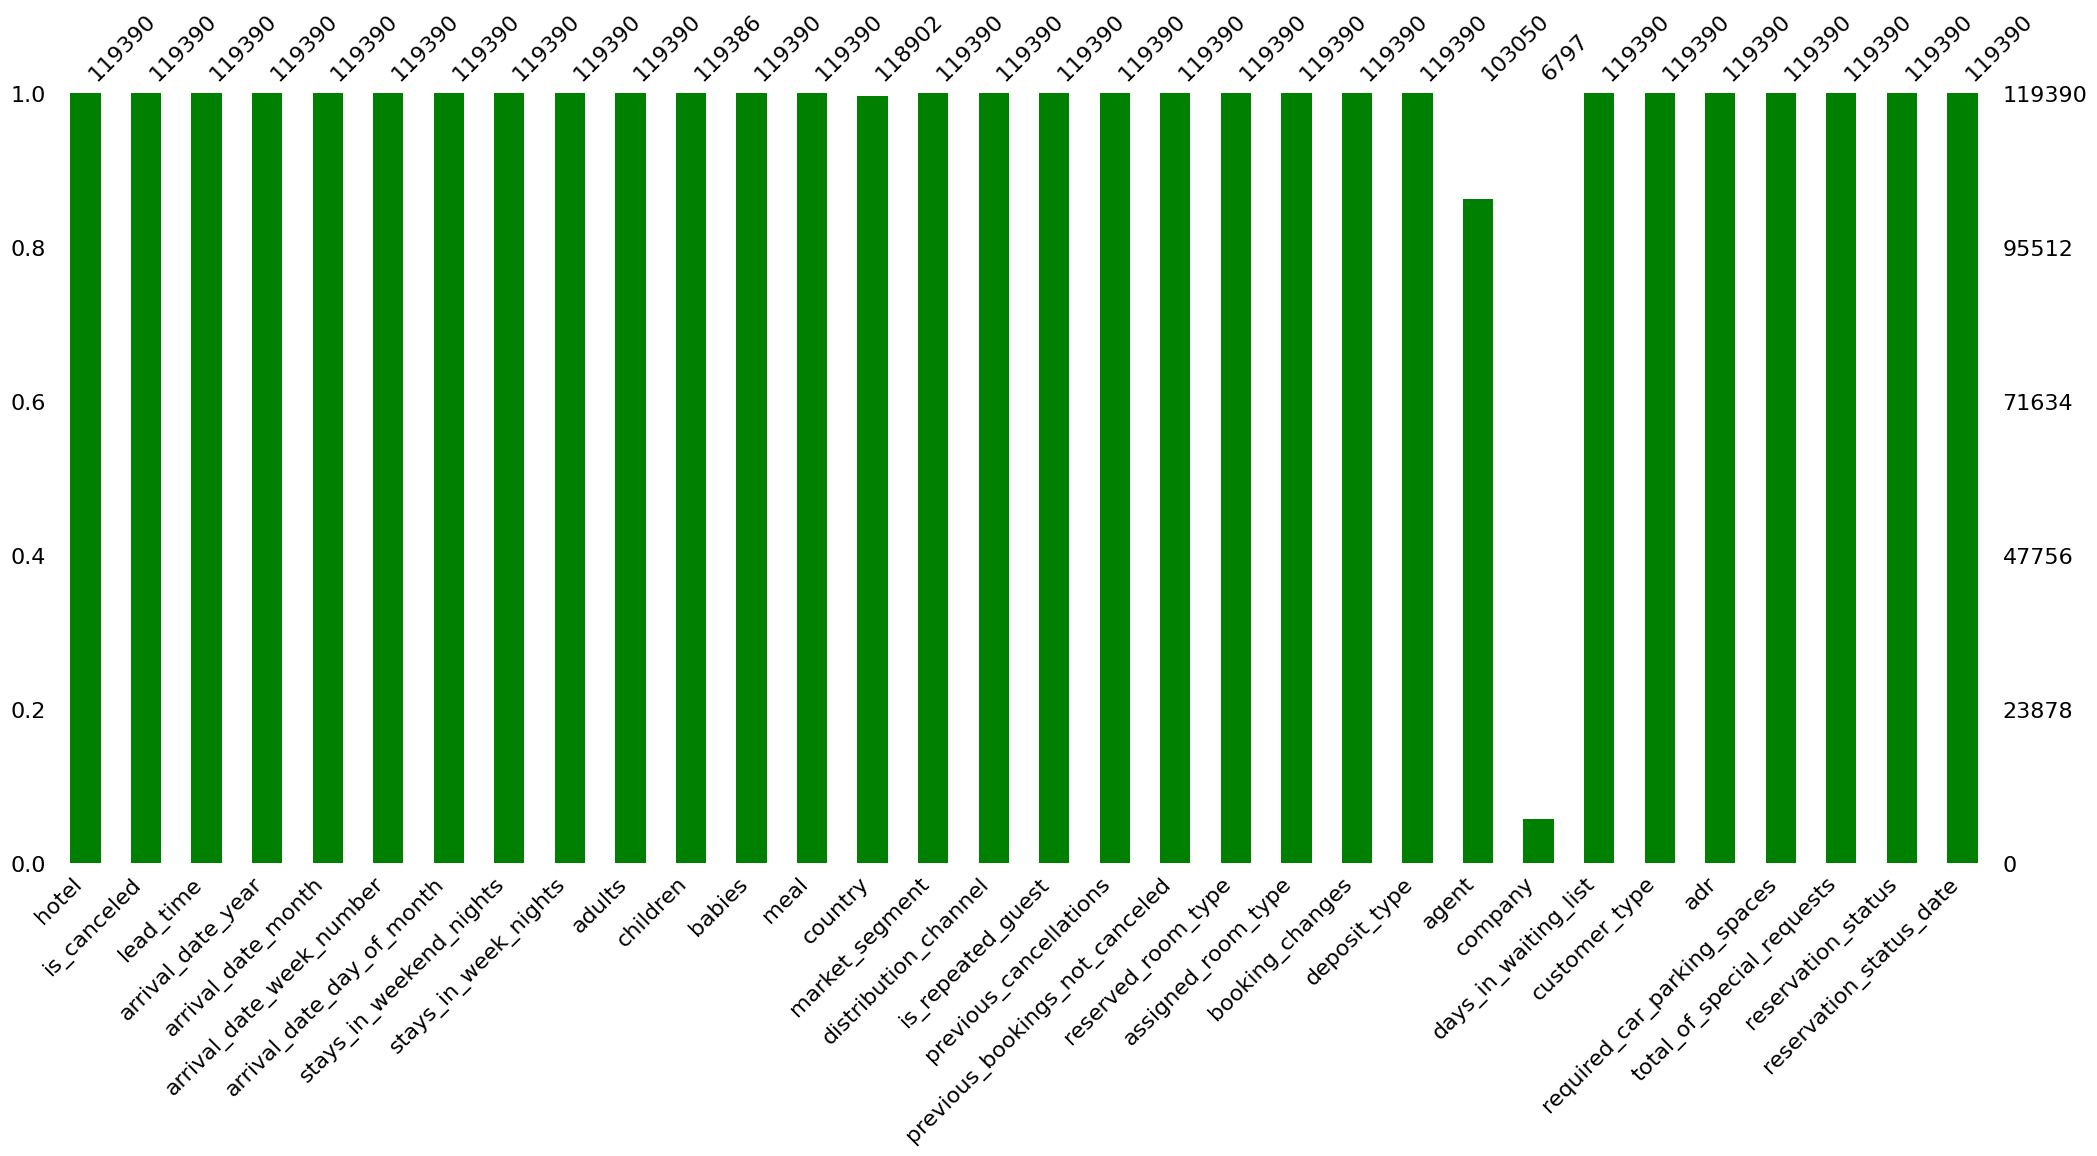

In [8]:
# Visualizing the missing values
msno.bar(hotel_df, color = 'green')

### What did you know about your dataset?

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other thing.


The above dataset has 119390 rows and 32 columns. some columns like 'children', 'company', 'country' and 'agent' have null values and there are 31994 duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Dataset Describe
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

### Check Unique Values for each variable.

In [11]:
# unique values for each variable.
df_unique_counts = hotel_df.nunique().to_frame().reset_index()
df_unique_counts.columns = ['Variable','UniqueCounts']
print(df_unique_counts)

                          Variable  UniqueCounts
0                            hotel             2
1                      is_canceled             2
2                        lead_time           479
3                arrival_date_year             3
4               arrival_date_month            12
5         arrival_date_week_number            53
6        arrival_date_day_of_month            31
7          stays_in_weekend_nights            17
8             stays_in_week_nights            35
9                           adults            14
10                        children             5
11                          babies             5
12                            meal             5
13                         country           177
14                  market_segment             8
15            distribution_channel             5
16               is_repeated_guest             2
17          previous_cancellations            15
18  previous_bookings_not_canceled            73
19              rese

In [12]:
# Creating useful categorical columns list
cat_column_list = ['hotel', 'is_canceled', 'arrival_date_year', 'meal','market_segment', 'distribution_channel', 'is_repeated_guest', 
                   'reserved_room_type','assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

In [13]:
# using for loop, printing all the unique values of some of the useful categorical columns
for col in cat_column_list:
  print(f"Unique values in column {col} is:")
  print(hotel_df[col].unique())
  print("")

Unique values in column hotel is:
['Resort Hotel' 'City Hotel']

Unique values in column is_canceled is:
[0 1]

Unique values in column arrival_date_year is:
[2015 2016 2017]

Unique values in column meal is:
['BB' 'FB' 'HB' 'SC' 'Undefined']

Unique values in column market_segment is:
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

Unique values in column distribution_channel is:
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

Unique values in column is_repeated_guest is:
[0 1]

Unique values in column reserved_room_type is:
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

Unique values in column assigned_room_type is:
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']

Unique values in column deposit_type is:
['No Deposit' 'Refundable' 'Non Refund']

Unique values in column customer_type is:
['Transient' 'Contract' 'Transient-Party' 'Group']

Unique values in column reservation_status is:
['Check-Out' 'Canceled' 'No-Show']



## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Creating a copy so as not to disturb original dataset
hotel_df_copy = hotel_df.copy()

**DATA CLEANING/MANIPULATIONS**

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1. Drop duplicate rows \
2. Handling missing values. \
3. Convert columns to appropriate datatypes. \
4. Adding important columns

**Step 1: Drop duplicate rows**

In [15]:
# droping duplicate values
hotel_df_copy.drop_duplicates(inplace = True)

As there are 31994 duplicate rows in the dataset, so we are simply dropping all the duplicate rows from our dataset

**Step2: Handling missing values**

In [16]:
# Columns having missing values.
hotel_df_copy.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

Looks like we have quite alot of NaN values in company and agent. Highly doubt they have an impact on the analysis and will remove the 2 columns. So removing columns will be a better idea since those 2 attributes (agents and company) are unimportant.

In [17]:
# droping 'agent' and 'company' columns from dataset
hotel_df_copy = hotel_df_copy.drop(columns = ['agent', 'company'])

In [18]:
hotel_df_copy['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [19]:
# checking value count of 'children' column
hotel_df_copy['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

Since mode of the children column is '0.0', So we will replace all NaN values with '0.0'

In [20]:
hotel_df_copy['children'].fillna(value = 0.0, inplace = True)

Next column with null value is 'country'. Since, this column has datatype of string. We will replace the null values with the 'other' as we do not have much null values compare size of the dataset.

In [21]:
# replacing nan values with 'other' in country column
hotel_df_copy['country'].fillna(value = 'other', inplace = True)

In [22]:
# Checking if all null values are removed
hotel_df_copy.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [23]:
# checking if we have any rows with total number of adults, children and babies equal to zero
hotel_df_copy[hotel_df_copy['adults']+hotel_df_copy['babies']+hotel_df_copy['children'] == 0].shape

(166, 30)

we will remove such rows because it does not make any sense that the booking was done for no one.

In [24]:
hotel_df_copy.drop(hotel_df_copy[hotel_df_copy['adults']+hotel_df_copy['babies']+hotel_df_copy['children'] == 0].index, inplace = True)

**Step 3: Converting columns to appropriate datatypes.**

Since 'children' and 'reservation_status_date' columns are not in correct datatype formate, we will converting them into appropriate datatype formates.

In [25]:
# Converting datatype of column 'children' from float to int.
hotel_df_copy['children'] = hotel_df_copy['children'].astype('int64')

# changing datatype of column 'reservation_status_date' to data_type.
hotel_df_copy['reservation_status_date'] = pd.to_datetime(hotel_df_copy['reservation_status_date'], format = '%Y-%m-%d')

**Step 4: Adding important columns**

we will adding two coulumns which will be required to analyse and get some insights from the dataset,

first one is, total_people = adults + children + babies

second one, total_stay = stays_in_week_nights + stays_in_weekend_nights

In [26]:
# adding column of total_people
hotel_df_copy['total_people'] = hotel_df_copy['adults']+hotel_df_copy['children']+hotel_df_copy['babies']

# adding colum of total stay
hotel_df_copy['total_stay'] = hotel_df_copy['stays_in_weekend_nights']+hotel_df_copy['stays_in_week_nights']

# creating function to check if same room type not alloted

def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

# applying lamda funtion to create one column of "same_room_not_alloted"
hotel_df_copy['same_room_not_alloted'] = hotel_df_copy.apply(lambda x : check_room_allot(x), axis = 1)

In [27]:
# checking if columns are added
hotel_df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay', 'same_room_not_alloted'],
      dtype='object')

**Step 5: cleaning wrong filled data**

In [28]:
hotel_df_copy['adr'].describe()

count    87230.000000
mean       106.518031
std         54.891227
min         -6.380000
25%         72.250000
50%         98.200000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

Since, adr is average daily rate and it should be greater than or equal to 0. so we will remove these values from our dataset.

In [29]:
hotel_df_copy[hotel_df_copy['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay,same_room_not_alloted
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2,10,1


In [30]:
# we can remove this permanently from our database

hotel_df_copy.drop(hotel_df_copy[hotel_df_copy['adr'] < 0].index, axis = 0, inplace= True)

In [31]:
# checking if adr < 0 deleted
hotel_df_copy[hotel_df_copy['is_canceled'] == 0]['adr'].describe()

count    63220.000000
mean       102.215920
std         51.240558
min          0.000000
25%         68.000000
50%         94.890000
75%        129.417500
max        510.000000
Name: adr, dtype: float64

In [32]:
# creating final copy of dataframe
df = hotel_df_copy.copy()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Checking correlation between numerical columns

<Axes: >

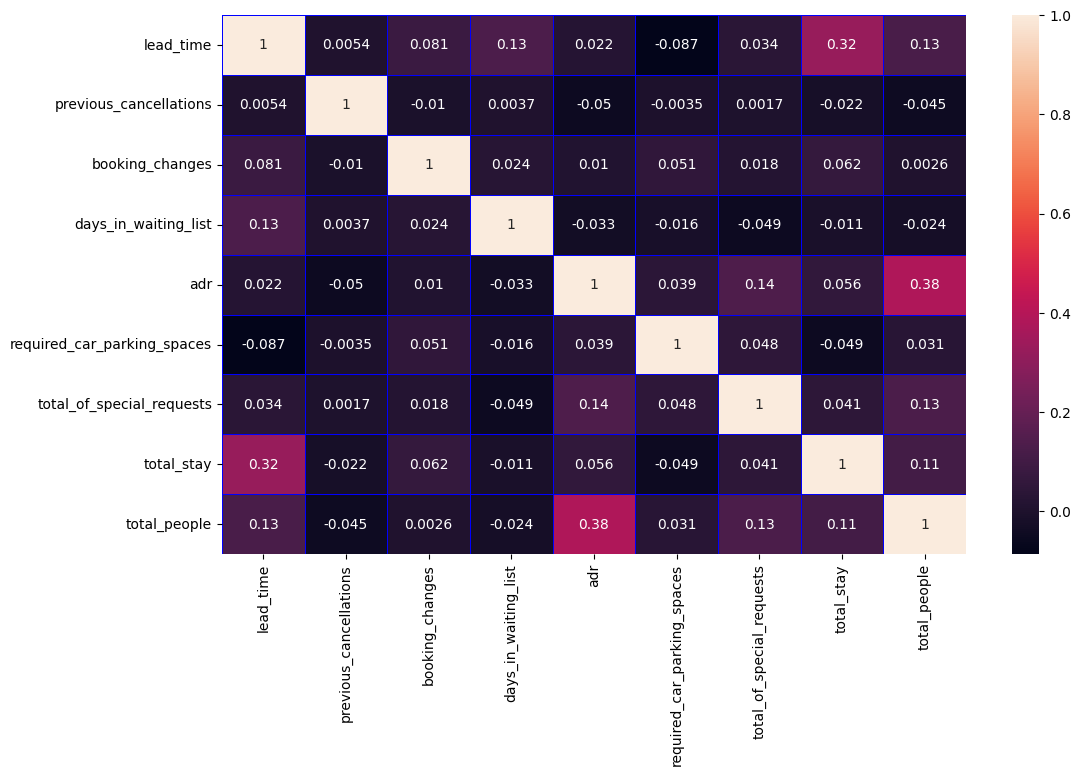

In [33]:
# Chart - 1 visualization code
# filtering numerical columns
num_df = df[['lead_time','previous_cancellations','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


# visualization using heatmap
fig, ax = plt.subplots(figsize=(12, 7))

sns.heatmap(num_df.corr(),annot = True,linewidths=0.5,linecolor='blue')

##### 1. Why did you pick the specific chart?

Heatmaps are used in various forms of analytics but are most commonly used to show user behavior on specific webpages or webpage templates. Heatmaps can be used to show where users have clicked on a page, how far they have scrolled down a page or used to display the results of eye-tracking tests.

##### 2. What is/are the insight(s) found from the chart?

1. Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2. adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2 Percentage of booking in each hotel type

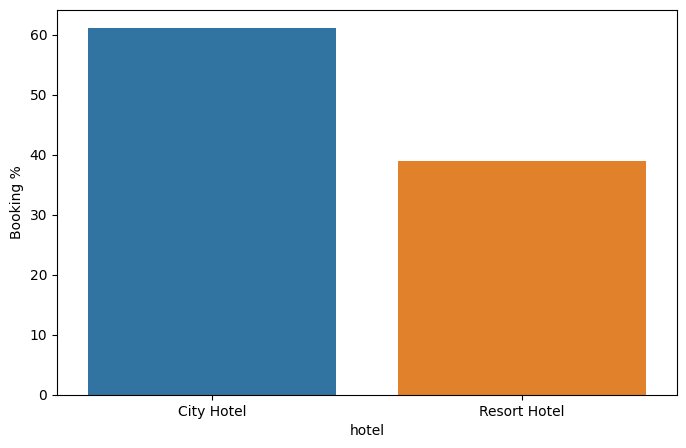

In [34]:
# Chart - 2 visualization code using barplot
# Showing percentage of bookings in each hotel
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

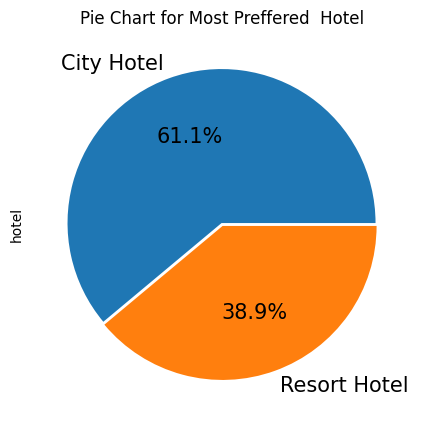

In [35]:
#checking exact percentage using pie plot
df['hotel'].value_counts().plot.pie(explode=[0.01, 0.01], autopct='%1.1f%%', figsize=(5,5),fontsize=15)   
plt.title('Pie Chart for Most Preffered  Hotel')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a visual tool that uses bars to compare data among categories. The important thing to know is that the longer the bar, the greater its value.

Bar charts consist of two axes. On a vertical bar charts, as shown above, the horizontal axis (or x-axis) shows the data categories. In this example, they are hotels. The vertical axis (or y-axis) is the booking percentage. The colored bars are the data series.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Count Plot on Hotel preferences by Customer type

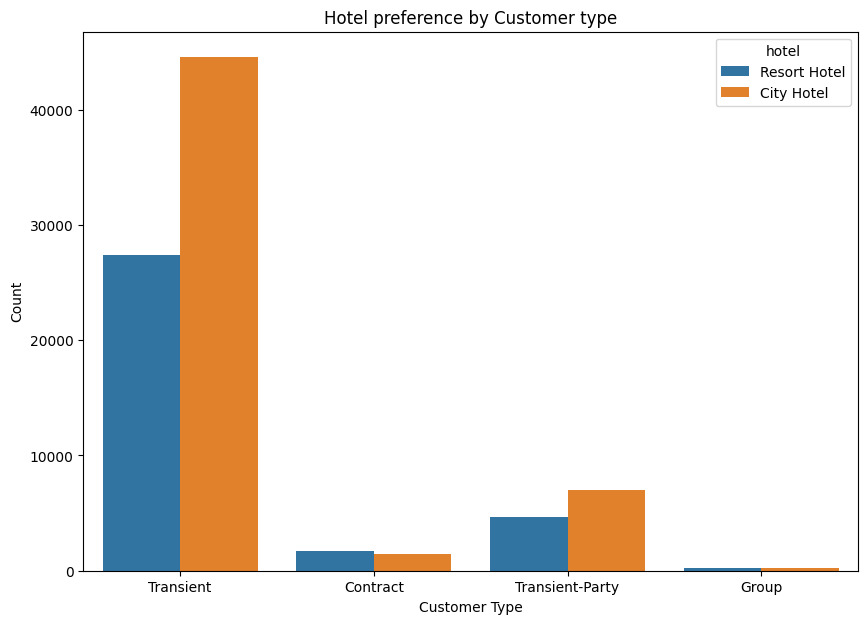

In [36]:
# Chart - 3 visualization code
# showing hotel preference by customer type
plt.figure(figsize= (10,7))
sns.countplot(data = df, x = 'customer_type', hue ='hotel')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Hotel preference by Customer type')
plt.show()

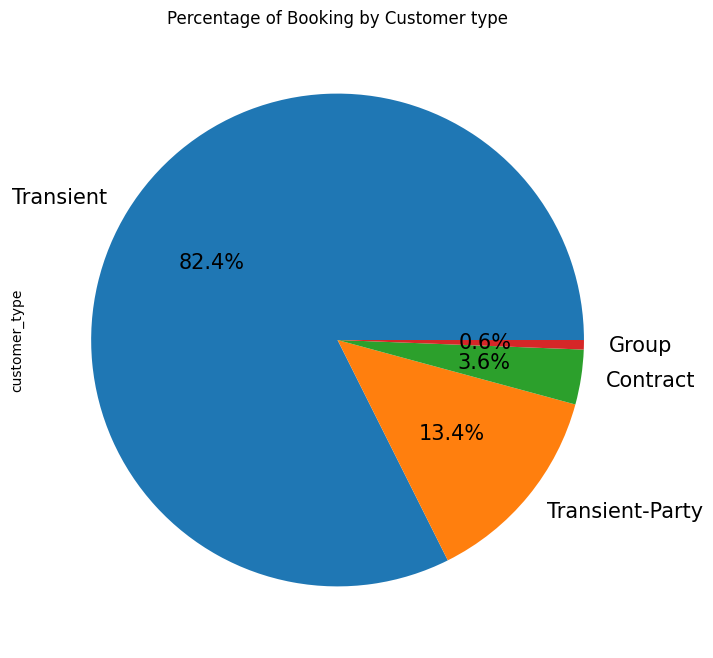

In [37]:
# most booking by customer type
df['customer_type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8),fontsize=15)   
plt.title('Percentage of Booking by Customer type')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is useful for Bivariate analysis. It helps in visualization for categorical 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Room type most in demand

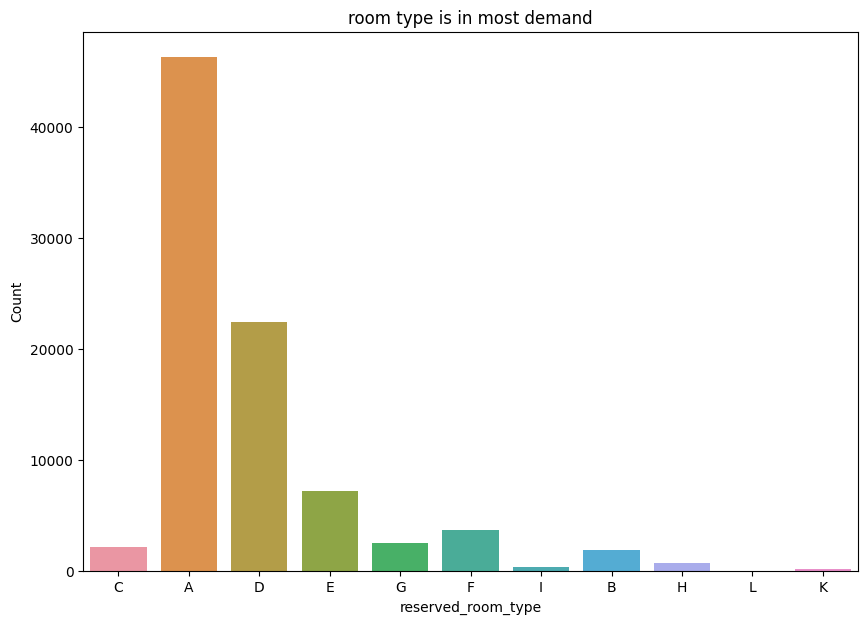

In [38]:
# Chart - 4 visualization code
# showing which room type is in most demand

plt.figure(figsize= (10,7))
sns.countplot(x = 'assigned_room_type', data = df )#, hue = 'hotel')
plt.xlabel('reserved_room_type')
plt.ylabel('Count')
plt.title('room type is in most demand')
plt.show()

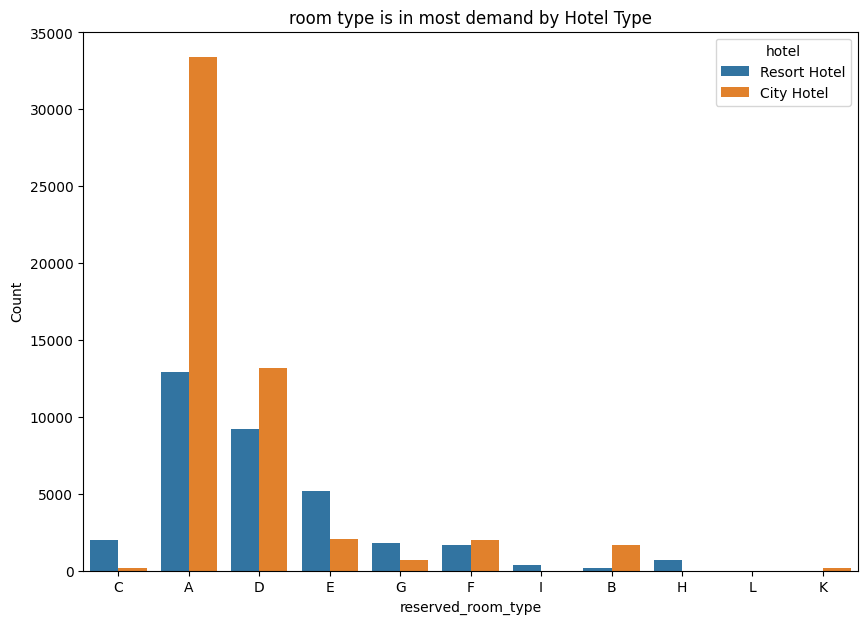

In [39]:
# showing room type most in demand by hotel type

plt.figure(figsize= (10,7))
sns.countplot(x = 'assigned_room_type', data = df,hue = 'hotel')
plt.xlabel('reserved_room_type')
plt.ylabel('Count')
plt.title('room type is in most demand by Hotel Type')
plt.legend(loc='upper right', title='hotel')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. Most demanded room type is A.
2. I,L,K are the low demand room type.
3. In city hotel hotel room type A is more demanded comapre to Resort hotels

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Hotels should increase the no. of room types A and D to maximise revenue.

#### Chart - 5 Room type generating high revenues

In [40]:
df[df['adr'] > 500]['adr'].sort_values(ascending=False)

48515     5400.0
111403     510.0
15083      508.0
Name: adr, dtype: float64

we can see that there is an outliers in adr column which can affect our visualization

In [41]:
# filtering the data for adr < 1000
temp_df1 = df[df['adr'] < 1000]

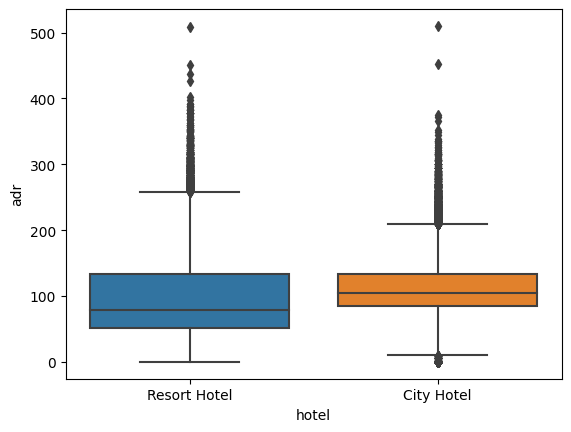

In [42]:
# Chart - 5 visualization code
# Box Plot - checking average daily rate (adr) for Hotel type
sns.boxplot(x = temp_df1['hotel'], y = temp_df1['adr'])
plt.show()

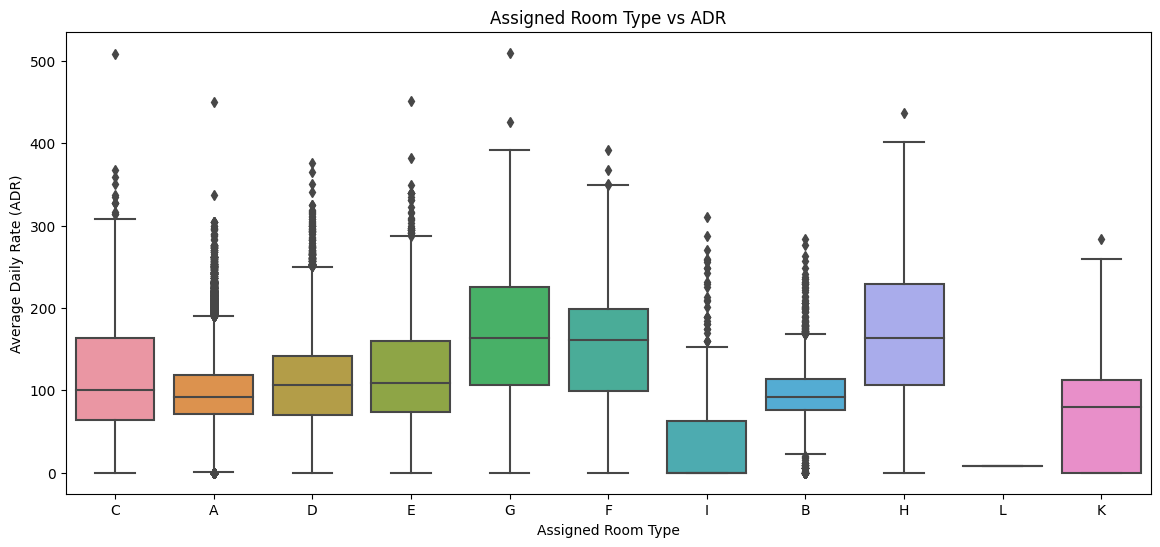

In [43]:
# Box Plot - checking average daily rate (adr) for room types

plt.figure(figsize= (14,6))
sns.boxplot(x = temp_df1['assigned_room_type'], y = temp_df1['adr'])

# set lables
plt.title('Assigned Room Type vs ADR')
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are a commonly used statistical graph that visually represents the distribution of a dataset. They provide a clear and concise summary of the data, allowing for easy identification of the median, quartiles, and outliers. By analyzing the spread of the data and identifying any potential problems, box plots can assist with making data-driven decisions. They are particularly useful in quality control and data analysis, where identifying potential issues is critical. Compared to other graphs, such as histograms, box plots offer a more standardized approach that provides a clear visual summary, making it easier to compare and analyze data across datasets.

##### 2. What is/are the insight(s) found from the chart?

 The highest revenue is coming from room types H and G, despite their lower booking demand compared to room type A. This is likely because their rates are higher than that of room type A, which has a higher demand but lower average daily rate (ADR).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses could increase the availability of room types G and H as they contribute more to revenues. Additionally, offering discounts on these room types could attract customers who typically book the lower ADR room type A. This would help to increase revenue from these room types, which currently have lower demand but higher rates compared to room type A.

#### Chart - 6 Does stay duration and hotel type affect the ADR?

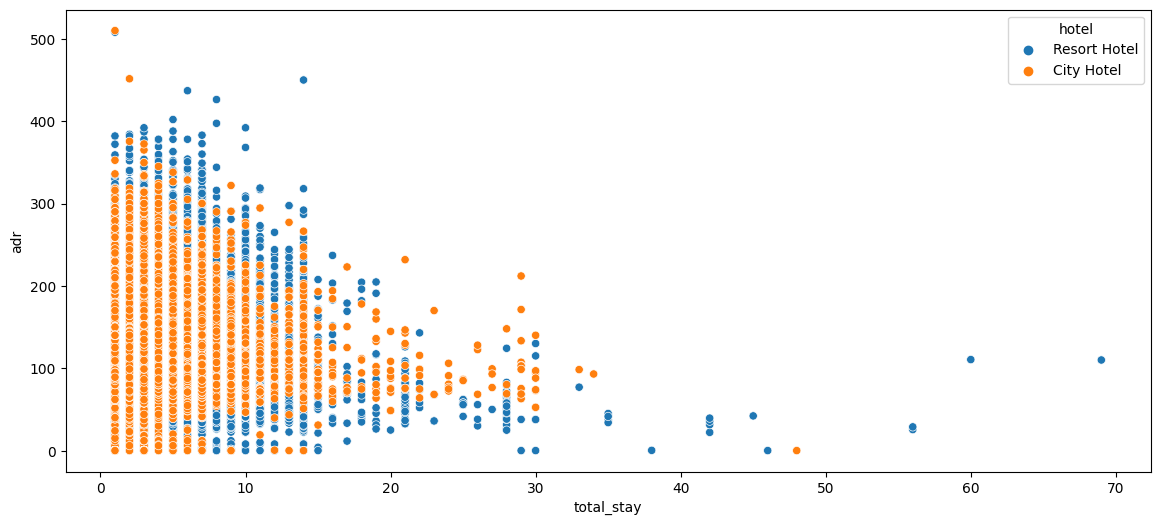

In [44]:
# Chart - 6 visualization code
# Visualizing if stay duration and adr have any correlation

plt.figure(figsize= (14,6))

sns.scatterplot(data= temp_df1[temp_df1['total_stay']>0], x='total_stay', y='adr',hue='hotel')
plt.show()

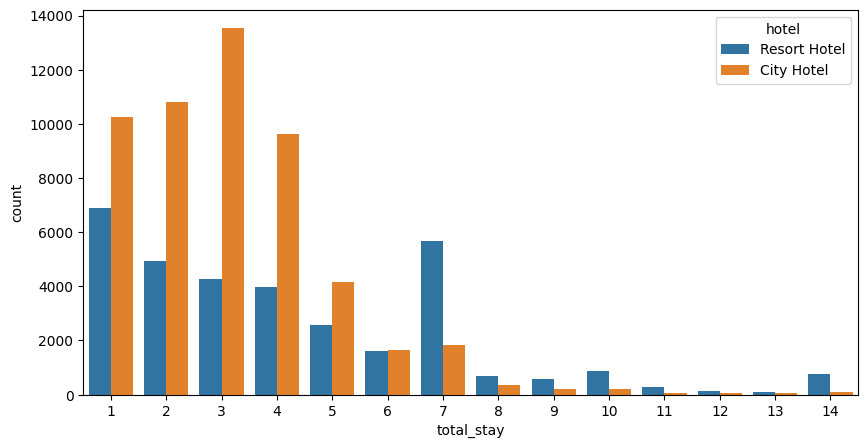

In [45]:
# preferred stay length in each hotel 
# filtering for non cancelled booking 

temp_df2 = df[(df['total_stay'] > 0) & (df['total_stay'] < 15)]

plt.figure(figsize = (10,5))
sns.countplot(x = temp_df2['total_stay'], hue = temp_df2['hotel'])
plt.show()

##### 1. Why did you pick the specific chart?

A scatter chart is a visualization tool that displays the relationship between two numerical variables using points on a graph. The x and y values of each point represent a single data point. Scatter charts are useful for detecting patterns, trends, and correlations in data and for identifying any outliers or anomalies. They are frequently used in exploratory data analysis, modeling, and statistical analysis. The points on the chart can be customized in shape and color to represent additional information, making scatter charts a versatile and powerful visualization tool for complex data.

Count plots are a type of categorical plot in data visualization that display the frequency of categorical variables. They are useful for understanding the distribution of categorical data and comparing frequencies of different categories within the same dataset. Count plots can be easily customized to improve their visual appearance and interpretation, making them a simple and effective tool for analyzing categorical data.

##### 2. What is/are the insight(s) found from the chart?

1. Based on the visualization above, we can observe that there is a negative correlation between the length of total stay and the average daily rate (ADR). Specifically, as the length of stay increases, the ADR tends to decrease. This suggests that customers who stay for longer periods may be able to negotiate better deals.
2. Another observation is that customers with shorter stays tends to choose city hotels, while customers with longer stays tends to choose resort hotels.
3. For shorter stays, resort hotels have a higher ADR compared to city hotels.
4. For longer stays, city hotels have a higher ADR compared to resort hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Resort hotels should consider offering lower ADRs to attract customers who are looking for shorter stays.
2. City hotels should offer discounts on ADRs for longer stays to attract customers who are looking for extended stays

#### Chart - 7 Percentage of Booking Cancellations

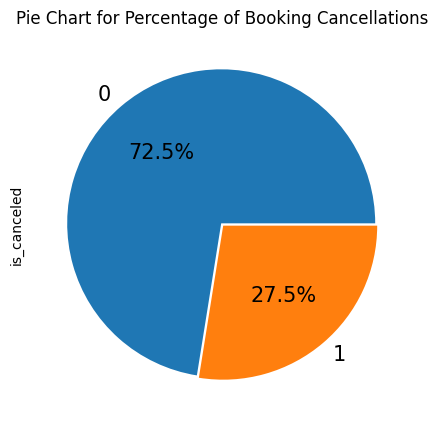

In [46]:
# Chart - 7 Pie Chart
# checking Percentage of booking cancellations 

df['is_canceled'].value_counts().plot.pie(explode=[0.01, 0.01], autopct='%1.1f%%', figsize=(5,5),fontsize=15)   
plt.title('Pie Chart for Percentage of Booking Cancellations')
plt.show()

# 1 - Not Canceled, 0 - Canceled

##### 1. Why did you pick the specific chart?

Pie charts are helpful for showing how much of something belongs to different groups when there aren't too many groups. They can be difficult to use if you're comparing groups that are close in size or if you have a lot of groups. It's important to choose the right type of chart for your data so that it's easy to understand.

##### 2. What is/are the insight(s) found from the chart?

The visualization shows that approximately 27.5% of the bookings are being canceled, indicating that roughly one-fourth of the total bookings are being  canceled.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights provide businesses with data on their cancellation rates, allowing hotels to analyze the reasons behind high cancellation rates and identify areas where services can be improved. This analysis can lead to lower cancellation rates for hotel bookings, resulting in increased customer satisfaction and potentially greater profitability for the business.

#### Chart - 8 Proportion of booking cancellations vis a vis bookings

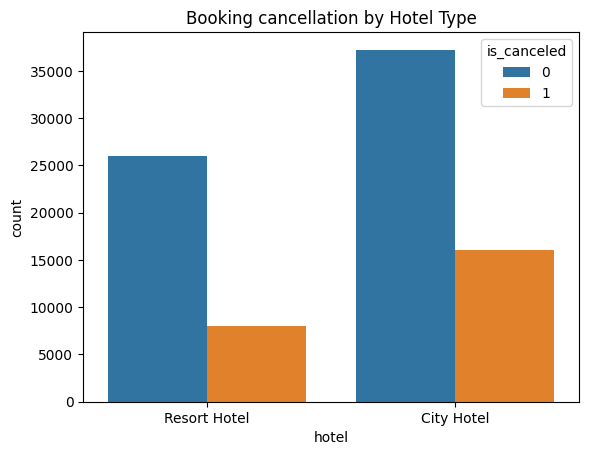

In [70]:
# Chart - 8 visualization code
# Visualizing proportion of booking cancellations vis a vis bookings

sns.countplot(x = "hotel", hue = 'is_canceled', data = df)
plt.title("Booking cancellation by Hotel Type")
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is a type of chart that is used to display the frequency or count of categorical data. It is particularly helpful for identifying patterns and trends within a dataset, especially when the data has only a few categories. Count plots can be useful for comparing the frequency of categories across different subgroups or groups. They are frequently used for exploratory data analysis and for presenting categorical data in a clear and easy-to-understand manner.

##### 2. What is/are the insight(s) found from the chart?

According to the visualization, the cancellation rate was approximately 40% for city hotels and 30% for resort hotels. This indicates that the cancellation rate is significantly higher for city hotels, which could have a negative impact on the business's profitability.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights can assist both city and resort hotels in identifying the reasons behind their high cancellation rates. The visualization suggests that city hotels have a higher cancellation rate than resort hotels, indicating that these hotels may need to focus on improving their cancellation policies or addressing underlying issues that contribute to cancellations. By reducing their cancellation rates, hotels can potentially increase their revenue and profitability.

#### Chart - 9 Which customer type tend to cancel more

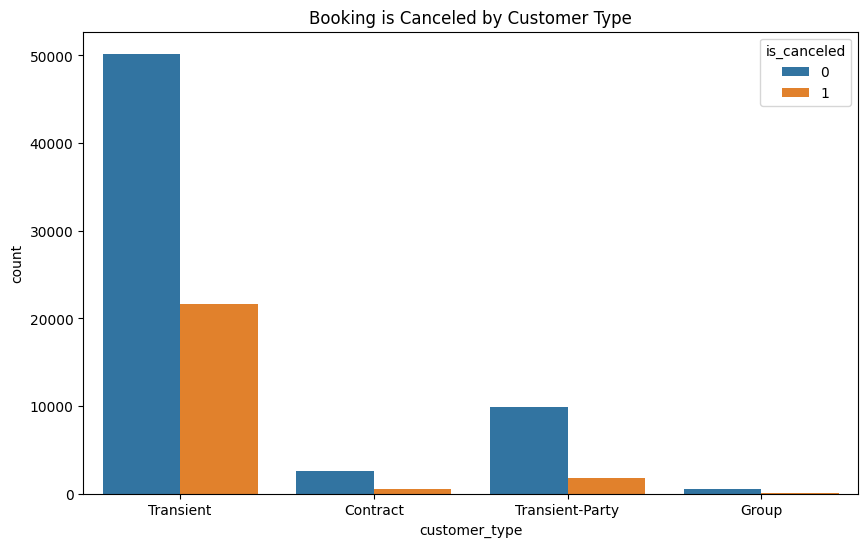

In [48]:
# Chart - 9 visualization code
# checking Which customer type tend to cancel more

plt.figure(figsize = (10,6))
sns.countplot(x = "customer_type", hue ='is_canceled', data = df)
plt.title("Booking is Canceled by Customer Type")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is a type of chart that is used to display the frequency or count of categorical data. It is particularly helpful for identifying patterns and trends within a dataset, especially when the data has only a few categories. Count plots can be useful for comparing the frequency of categories across different subgroups or groups. They are frequently used for exploratory data analysis and for presenting categorical data in a clear and easy-to-understand manner.

##### 2. What is/are the insight(s) found from the chart?

1. Transient customers tends to cancel more as they have more bookings compared to other customers. 
2. Around 40% Transient customers cancel their bookings.  
3. Contract, Transient-Party and Group customers have lesser cancellation rate compared to Transient Customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since transient customers are more likely to cancel their bookings, hotels should consider collecting feedback from these customers to determine the reasons for cancellation. If the majority of customers are providing the same reason, then hotels should focus on improving that area to reduce the cancellation rate.

#### Chart - 10 Reservered and assigned room impact on cancellation

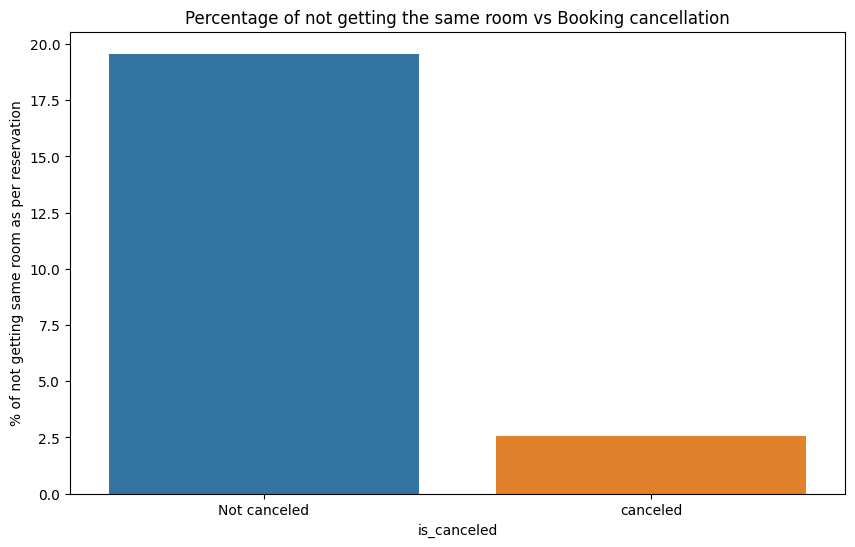

In [49]:
# Chart - 10 visualization code
# checking cancellation rate if same room type not alloted

#grouped by is_canceled
grouped_by_canceled = df.groupby('is_canceled')

temp_df3 = pd.DataFrame(grouped_by_canceled['same_room_not_alloted'].sum()*100/grouped_by_canceled.size()).rename(columns={0:'percentage_canceled'})

# visualisation using barplot
plt.figure(figsize = (10,6))
sns.barplot(x = temp_df3.index, y = temp_df3['percentage_canceled'])

# set labels
plt.title('Percentage of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])
plt.show()


##### 1. Why did you pick the specific chart?

Bar plots are commonly used to represent categorical data and are an easy to interpret, flexible, and visually appealing way to visualize the frequency or proportion of different categories in a dataset. They are especially useful for comparing the distribution of data between different groups and are widely used in many different contexts.

##### 2. What is/are the insight(s) found from the chart?

The visualization shows that people don't usually cancel their room bookings just because they didn't get the exact room they asked for. Even when they are given a different room, many people still choose to keep their booking without cancelling it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If a different room type is assigned, it does not have a significant impact on hotel booking cancellations.

#### Chart - 11 Does not getting same room affects the ADR?

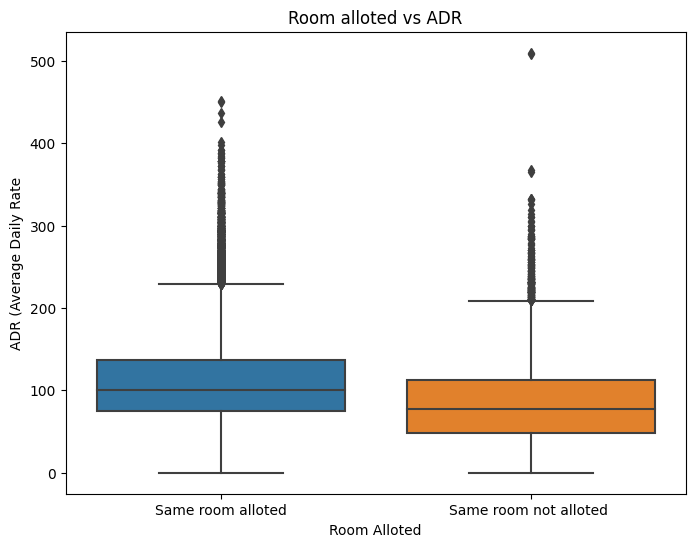

In [71]:
# Chart - 11 visualization code
# Visualizing if not getting same room affects the adr using box plot

plt.figure(figsize = (8,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = temp_df1)

# set labels
plt.xlabel('Room Alloted')
plt.ylabel('ADR (Average Daily Rate')
plt.title('Room alloted vs ADR')
plt.xticks([0,1],['Same room alloted','Same room not alloted '])
plt.show()


##### 1. Why did you pick the specific chart?

Box plots are a commonly used statistical graph that visually represents the distribution of a dataset. They provide a clear and concise summary of the data, allowing for easy identification of the median, quartiles, and outliers. By analyzing the spread of the data and identifying any potential problems, box plots can assist with making data-driven decisions. They are particularly useful in quality control and data analysis, where identifying potential issues is critical. Compared to other graphs, such as histograms, box plots offer a more standardized approach that provides a clear visual summary, making it easier to compare and analyze data across datasets.

##### 2. What is/are the insight(s) found from the chart?

We can oberve from the above visualization that if same room not alloted then customers has paid lesser ADR compared to same room alloted.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not assigning the requested room type can have a negative impact on hotel revenue. When the same room type is not allocated, there is a slight reduction in the average daily rate (ADR), which can directly reduce the hotel's profit.

#### Chart - 12 Children or Babies impact on Cancellation

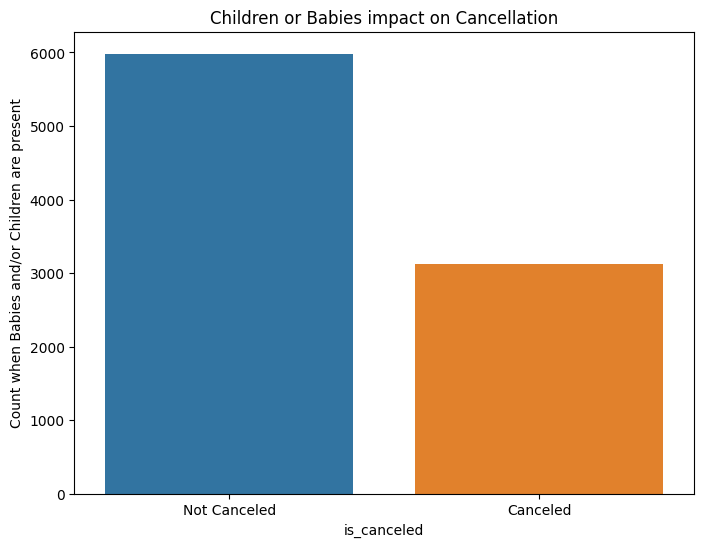

In [72]:
# Chart - 12 visualization code
# filtering dataframe when 'babies' > 0 and 'children' > 0

temp_df4 = df[(df['babies'] > 0) | (df['children'] > 0)]

# visualizing cancellation rate when babies and/or children(s) are present

plt.figure(figsize = (8,6))
sns.countplot(x = 'is_canceled', data = temp_df4)

# set labels
plt.title('Children or Babies impact on Cancellation')
plt.ylabel('Count when Babies and/or Children are present')
plt.xticks([0,1],['Not Canceled','Canceled'])
plt.show()

In [52]:
temp_df4['is_canceled'].value_counts()

0    5985
1    3118
Name: is_canceled, dtype: int64

In [53]:
# cancellation rate is more than 50% if babies and/or childrens are included in the bookings.

##### 1. Why did you pick the specific chart?

A count plot is a type of chart that is used to display the frequency or count of categorical data. It is particularly helpful for identifying patterns and trends within a dataset, especially when the data has only a few categories. Count plots can be useful for comparing the frequency of categories across different subgroups or groups. They are frequently used for exploratory data analysis and for presenting categorical data in a clear and easy-to-understand manner.

##### 2. What is/are the insight(s) found from the chart?

1. The visualization shows that if bookings include babies or children, the cancellation rate is over 50%. 
2. This suggests that when babies or children are part of the booking, there is a high likelihood of cancellation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Children or Babies impact on Cancellation : YES

It's clearly visible in the above chart children and babies are impacting the cancellation rate. Hotels need to provide additional care and services to address the needs of families with young children, potentially reducing the likelihood of cancellations.

#### Chart - 13 Which distribution channel has the highest cancellation percentage?

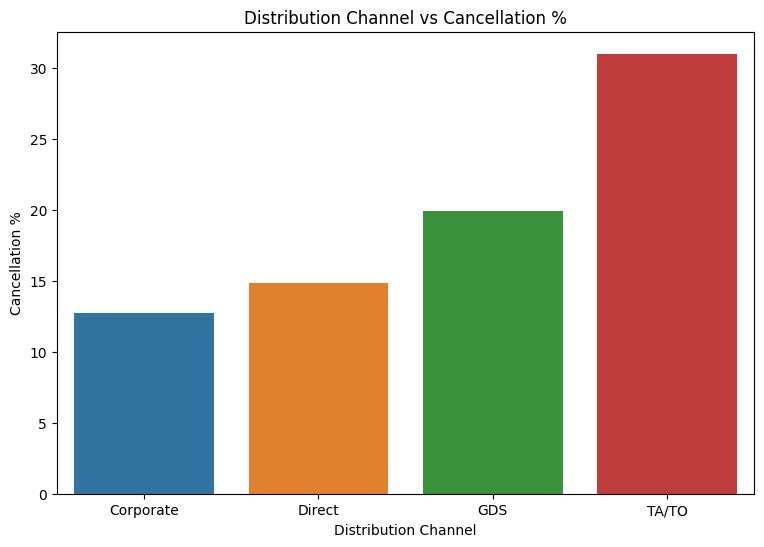

In [74]:
# Chart - 13 visualization code

# grouped by distrribution channel

grp_by_dc = df.groupby('distribution_channel')

temp_df5 = pd.DataFrame((grp_by_dc['is_canceled'].sum()/grp_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancellation Percentage'})

# visualizing Which distribution channel has the highest cancellation percentage

plt.figure(figsize = (9,6))
sns.barplot(x = temp_df5.index, y = temp_df5['Cancellation Percentage'])

# set labels
plt.title('Distribution Channel vs Cancellation %')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation %')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are commonly used to represent categorical data and are an easy to interpret, flexible, and visually appealing way to visualize the frequency or proportion of different categories in a dataset. They are especially useful for comparing the distribution of data between different groups and are widely used in many different contexts.

##### 2. What is/are the insight(s) found from the chart?

The visualization above shows that the distribution channel TA/TO has the highest percentage of booking cancellations, with a cancellation rate of more than 30%. Bookings made through GDS also have a higher cancellation rate compared to those made through Corporate and Direct channels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the cancellation rate for TA/TO bookings is around 30%, which is higher compared to other distribution channels, hotels should focus on improving their outreach through other channels to reduce the cancellation rate. Doing so could result in higher revenue for the hotel.

#### Chart - 11

In [55]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [56]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [57]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [58]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [59]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***